# Projet de Deep Learning : "handwritten digits recognition"

## L'équipe

* BOUQUET Ewen - E4FI

* FOURNIER Loïc - E4FI

## Objectif

À partir des travaux du livre ["Neural networks and deep learning"](http://neuralnetworksanddeeplearning.com/), écris par Michael Nielsen en décembre 2019, réaliser un modèle pouvant faire de la reconnaissance de chiffre écrit à la main en se basant sur [la base de données MNIST](https://en.wikipedia.org/wiki/MNIST_database) avec un réseau multicouches classique, puis avec un réseau multicouches avec convolution.

# Code commun

Imports des librairies et des fichiers

In [1]:
from mnist_loader import load_data_wrapper
from plot import SmartPlot, randomColors

import numpy as np

import os.path
from os import path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import network  as n1
import network2 as n2
import network3 as n3

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Trying to run under a GPU.  If this is not desired, then modify network3.py to set the GPU flag to False.


Afficher une ou plusieurs images

In [2]:
def displayImages(fNames: list):
    for fName in fNames:
        if path.exists(fName):
            plt.imshow(mpimg.imread(fName))
            plt.show()

# Réseau multicouches classique

## Chargement des données

On charge les datasets d'entrainement, de validation et de test

In [3]:
training_data, validation_data, test_data = load_data_wrapper();
n_training_data, n_validation_data, n_test_data = len(training_data), len(validation_data), len(test_data);

Loading datasets...
Datasets loaded...
Formatting datasets...
Datasets formatted : 50000 images for training / 10000 images for validation / 10000 images for test.


## Utilisation du réseau 1

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 1 en fonction de certains paramètres.

In [4]:
def trainAndTestNet1(layers, training_data, test_data, epochs, batch_size, eta, plot, color):

    # On créée le réseau de neurones
    net = n1.Network(layers)
    
    print()
    print("Training Network {0}... > layers={1}, eta={2}".format(net.id, layers, eta))
    
    # On entraine le réseau à partir du dataset d'apprentissage
    successPercentage = net.SGD(training_data, test_data, epochs, batch_size, eta, plot, color)

    # Fin de l'entrainement de l'IA
    print("Network {0} trained...".format(net.id))
    print()

    return successPercentage

### Choix des layers

Dans notre cas, on souhaite tester l'efficacité du réseau en fonction de sa strucuration en terme de layers. On laisse ainsi fixe le nombre d'épochs, le pas et le batch_size et on teste ainsi plusieurs layers.

In [ ]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3

# Valeurs dynamiques
LAYERS = [ [ 28 * 28, 15 * i, 10 ] for i in range(1, 7) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/layers/")
COLORS = randomColors()

# On entraine et teste les réseaux de neurones
results = []
for i in range(len(LAYERS)):
    
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYERS[i], training_data, test_data, EPOCHS, BATCH_SIZE, ETA, PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best Network: {0} (layer={1}), with {2}% success rate!".format(id, LAYERS[id], max(results)))

# On sauvegarde le plot
PLOT.build()

En faisant tourner le même programme avec plus d'épochs (50), on obtient les résultats suivants : 

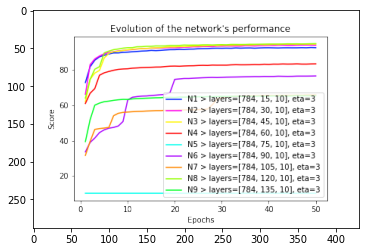

In [5]:
displayImages([ "./output/save/50_epochs/1/layers/plot_.png" ])

On voit bien que certains réseaux sont plus efficaces que d'autres. En particulier, les réseaux ayant les couches suivantes sont les plus efficientes : [784, 15, 10], [784, 30, 10] et [784, 45, 10]. On propose ainsi de continuer avec le réseau ayant les couches suivantes pour la suite du programme: [784, 15, 10], car il semble fiable, et sera plus efficient que les deux autres en terme de temps de calcul.

## Choix du pas

On reprends la même logique que tout à l'heure, mais dans un objectif de trouver le pas obtimal. On fixe ainsi le nombre d'epochs, le batch_size, et le layer, et on teste avec plusieurs valeurs de pas.

In [ ]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
LAYER = [784, 15, 10]

# Valeurs dynamiques
ETAS = [ 0.75 * i for i in range(1, 7) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/etas/")
COLORS = randomColors()

# On entraine et teste les réseaux de neurones
results = []
for i in range(len(ETAS)):
    
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYER, training_data, test_data, EPOCHS, BATCH_SIZE, ETAS[i], PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best Eta: {0} (eta={1}), with {2}% success rate!".format(id, ETAS[id], max(results)))

# On sauvegarde le plot
PLOT.build()

En faisant tourner le même programme avec plus d'épochs (50), on obtient les résultats suivants : 

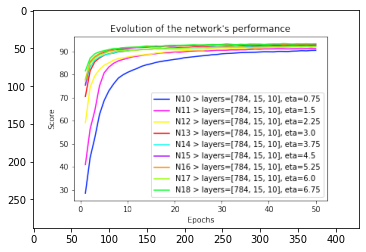

In [6]:
displayImages([ "./output/save/50_epochs/1/etas/plot_.png" ])

Encore un fois, on voit bien que certains sont plus intéressants que d'autres. En particulier, les pas suivants sont les plus efficients : 3.75, 4,5 et 5.25. On propose ainsi de continuer avec le pas 3.75.

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 1/3 pour l'apprentisage et 2/3 pour les tests ;

In [ ]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LAYER = [784, 15, 10]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/ratios/")
COLORS = randomColors()

# On entraine les réseaux de neurones
results = []
for i in range(3):
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYER, training_data[:int(TRAINING_SIZES[i])], test_data[:int(TEST_SIZES[i])], EPOCHS, BATCH_SIZE, ETA, PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best ratio: {0} (L={1}, T={2}), with {3}% success rate!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(results)))

# On sauvegarde le plot
PLOT.build()

Avec 50 epochs, on obtient le schéma suivant :

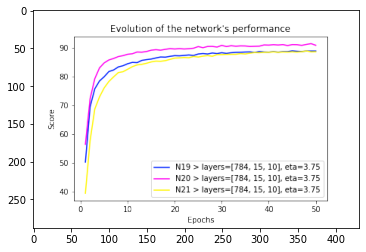

In [7]:
displayImages([ "./output/save/50_epochs/1/ratios/plot_.png" ])

Ainsi, même si les 3 réseaux sont performants, on remarque que le réseau 20 (violet) est plus performant que les autres. On conclut donc qu'il faut privilégier une taille de données importantes pour le dataset d'apprentissage. Et, au contraire, une quantité moins importante d'images de test peut être suffisante, du moment où celles-ci sont représentatives de l'ensemble des données du dataset d'apprentissage.

## Utilisation du réseau 2

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 2 en fonction de certains paramètres

In [8]:
def trainAndTestNet2(layers, training_data, test_data, epochs, batch_size, eta, lmbda, trainingCostPlot, trainingAccuracyPlot, evaluationCostPlot, evaluationAccuracyPlot, color):

    # On créée le réseau de neurones
    net = n2.Network(layers)
    
    print()
    print("Training Network {}... > layers={}, eta={}, lmbda={:.2f}".format(net.id, layers, eta, lmbda))
    print()
    
    # On entraine le réseau à partir du dataset d'apprentissage
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net.SGD(
        training_data, test_data, epochs, batch_size, eta, lmbda, trainingCostPlot, trainingAccuracyPlot, evaluationCostPlot, evaluationAccuracyPlot, color, 
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True, 
        monitor_training_cost=True, monitor_training_accuracy=True
    )

    # Fin de l'entrainement de l'IA
    print("Network {0} trained...".format(net.id))
    print()

    # On renvoie les résultats du dernier batch
    return evaluation_cost[-1], evaluation_accuracy[-1], training_cost[-1], training_accuracy[-1]

### Choix du lmbda

On va étudier l'effet du lmbda sur le réseau.

In [ ]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LAYER = [784, 15, 10]

# Valeurs dynamiques
LMBDAS = [ 0.02 * i for i in range(0, 5) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
TRAINING_COST_PLOT = SmartPlot("Evolution of the network's training cost", path="./output/2/lmbdas/training_cost/")
TRAINING_ACCURACY_PLOT = SmartPlot("Evolution of the network's training accuracy", path="./output/2/lmbdas/training_accuracy/")
EVALUATION_COST_PLOT = SmartPlot("Evolution of the network's evaluation cost", path="./output/2/lmbdas/evaluation_cost/")
EVALUATION_ACCURACY_PLOT = SmartPlot("Evolution of the network's evaluation accuracy", path="./output/2/lmbdas/evaluation_accuracy/")
COLORS = randomColors()

ecs, eas, tcs, tas = [], [], [], []
for i in range(len(LMBDAS)):
    # On entraine l'IA
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = trainAndTestNet2(LAYER, training_data, test_data, EPOCHS, BATCH_SIZE, ETA, LMBDAS[i], TRAINING_COST_PLOT, TRAINING_ACCURACY_PLOT, EVALUATION_COST_PLOT, EVALUATION_ACCURACY_PLOT, COLORS[i])

    # On ajoute les scores
    ecs.append(evaluation_cost)
    eas.append(evaluation_accuracy)
    tcs.append(training_cost)
    tas.append(training_accuracy)

TRAINING_ACCURACY_PLOT.build()
EVALUATION_ACCURACY_PLOT.build()
TRAINING_COST_PLOT.build()
EVALUATION_COST_PLOT.build()

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(ecs)
print("Best evaluation cost: {0} ({1:.4f}), with {2:.4f}!".format(id, LMBDAS[id], max(ecs)))

id = np.argmax(eas)
print("Best evaluation accuracy: {0} ({1}), with {2} / {3}!".format(id, LMBDAS[id], max(eas), n_test_data))

id = np.argmax(tcs)
print("Best training cost: {0} ({1:.4f}), with {2:.4f}!".format(id, LMBDAS[id], max(tcs)))

id = np.argmax(tas)
print("Best training accuracy: {0} ({1}), with {2} / {3}!".format(id, LMBDAS[id], max(tas), n_training_data))

En faisant tourner le même programme avec plus d'épochs (50), on obtient les résultats suivants : 

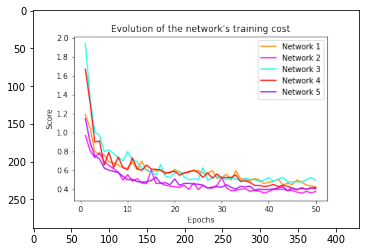

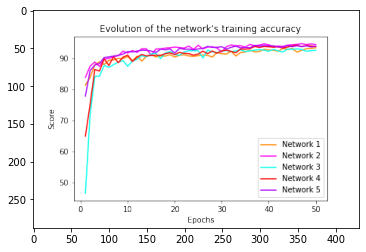

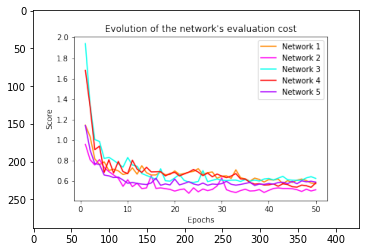

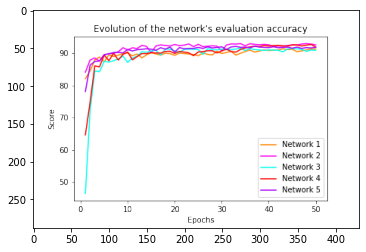

In [9]:
displayImages([ "./output/save/50_epochs/2/lmbdas/training_cost/plot_.png", "./output/save/50_epochs/2/lmbdas/training_accuracy/plot_.png", "./output/save/50_epochs/2/lmbdas/evaluation_cost/plot_.png", "./output/save/50_epochs/2/lmbdas/evaluation_accuracy/plot_.png" ])

Les lmbdas suivants sont les plus efficients : 0, 0,2 et 0,6. On propose ainsi de continuer avec le lmbda 0,0.

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 1/3 pour l'apprentisage et 2/3 pour les tests ;

In [ ]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LMBDA = 0.0
LAYER = [784, 15, 10]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
TRAINING_COST_PLOT = SmartPlot("Evolution of the network's training cost", path="./output/2/ratios/training_cost/")
TRAINING_ACCURACY_PLOT = SmartPlot("Evolution of the network's training accuracy", path="./output/2/ratios/training_accuracy/")
EVALUATION_COST_PLOT = SmartPlot("Evolution of the network's evaluation cost", path="./output/2/ratios/evaluation_cost/")
EVALUATION_ACCURACY_PLOT = SmartPlot("Evolution of the network's evaluation accuracy", path="./output/2/ratios/evaluation_accuracy/")
COLORS = randomColors()

ecs, eas, tcs, tas = [], [], [], []
for i in range(3):
    # On entraine l'IA
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = trainAndTestNet2(LAYER, training_data[:int(TRAINING_SIZES[i])], test_data[:int(TEST_SIZES[i])], EPOCHS, BATCH_SIZE, ETA, LMBDA, TRAINING_COST_PLOT, TRAINING_ACCURACY_PLOT, EVALUATION_COST_PLOT, EVALUATION_ACCURACY_PLOT, COLORS[i])

    # On ajoute les scores
    ecs.append(evaluation_cost)
    eas.append(evaluation_accuracy)
    tcs.append(training_cost)
    tas.append(training_accuracy)

TRAINING_ACCURACY_PLOT.build()
EVALUATION_ACCURACY_PLOT.build()
TRAINING_COST_PLOT.build()
EVALUATION_COST_PLOT.build()

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

# id = np.argmax(ecs)
# print("Best evaluation cost: {0} (L={1}, T={2}), with {3:.2f}!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(ecs)))

id = np.argmax(eas)
print("Best evaluation accuracy: {0} (L={1}, T={2}), with {3} / {4} ({5:.2f}%)!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(eas), n_test_data, max(eas) * 100 / int(TEST_SIZES[id])))

# id = np.argmax(tcs)
# print("Best training cost: {0} (L={1}, T={2}), with {3:.2f}!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(tcs)))

id = np.argmax(tas)
print("Best training accuracy: {0} (L={1}, T={2}), with {3} / {4} ({5:.2f}%)!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(tas), n_training_data, max(tas) * 100 / int(TRAINING_SIZES[id])))

Avec 50 epochs, on obtient les résultats suivants :

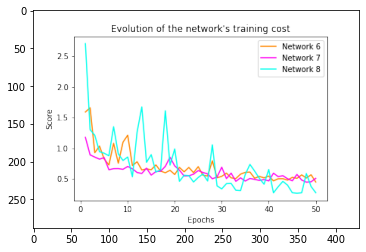

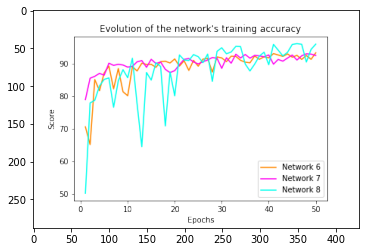

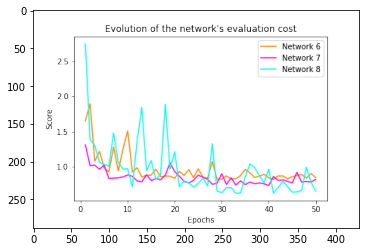

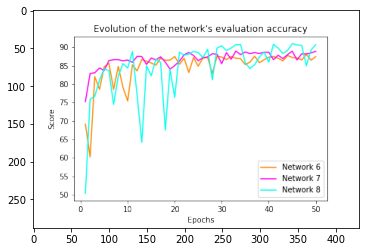

In [10]:
displayImages([ "./output/save/50_epochs/2/ratios/training_cost/plot_.png", "./output/save/50_epochs/2/ratios/training_accuracy/plot_.png", "./output/save/50_epochs/2/ratios/evaluation_cost/plot_.png", "./output/save/50_epochs/2/ratios/evaluation_accuracy/plot_.png" ])

Ainsi, même si les 3 réseaux sont performants, on remarque que les réseaux 6 (orange) et 7 (rose) sont plus performants que les autres. Comme tout à l'heure, on conclut qu'il faut privilégier une taille de données importantes pour le dataset d'apprentissage. Et, au contraire, une quantité moins importante d'images de test peut être suffisante, du moment où celles-ci sont représentatives de l'ensemble des données du dataset d'apprentissage.

On remarque également l'instabilité du réseau 8, qui a une précision qui peut varier du tout au tout en fonction de l'epoch...

# Réseau multicouches avec convolutions

## Chargement des données

On charge les datasets d'entrainement, de validation et de test

In [11]:
training_data, validation_data, test_data = n3.load_data()
n_training_data, n_validation_data, n_test_data = len(training_data[0]), len(validation_data[0]), len(test_data[0])

Datasets formatted : 50000 images for training / 10000 images for validation / 10000 images for test.


## Utilisation du réseau 3

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 3 en fonction de certains paramètres

In [12]:
def trainAndTestNet3(layers, training_data, validation_data, test_data, n_training_data, n_validation_data, n_test_data, epochs, batch_size, eta, lmbda, testAccuracyPlot, validationAccuracyPlot, learningCostPlot, color):

    # Reshape des données
    tr_data, va_data, te_data = n3.share_data(training_data, validation_data, test_data, n_training_data, n_validation_data, n_test_data)

    # On créée le réseau de neurones
    net = n3.Network(layers, batch_size)

    print()
    print("Training Network {}... > eta={}, lmbda={}, L={}, V={}, T={}".format(net.id, eta, lmbda, n_training_data, n_validation_data, n_test_data))
    print()
    
    # On entraine le réseau à partir du dataset d'apprentissage
    data = net.SGD(tr_data, epochs, batch_size, eta, va_data, te_data, lmbda, learningCostPlot, validationAccuracyPlot, testAccuracyPlot, color)

    # Fin de l'entrainement de l'IA
    print("Network {} trained...".format(net.id))
    print()

    # On renvoie les résultats du dernier batch
    return data

### Tests avec différents pas

On teste le réseau de neurones actuel avec des valeurs de pas différentes :

In [ ]:
# Valeurs fixes
EPOCHS = 10
BATCH_SIZE = 2 ** 7
LMBDA = 0.0
LAYER = [
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 1, 28, 28),
        filter_shape=(20, 1, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 20, 12, 12),
        filter_shape=(40, 20, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.FullyConnectedLayer(
        n_in=40 * 4 * 4, 
        n_out=100, 
        activation_fn=n3.ReLU
    ),
    n3.SoftmaxLayer(
        n_in=100, 
        n_out=10
    )
]

# Valeurs dynamiques
ETAS = [ 0.1 * i for i in range(1, 6) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
testAccuracyPlot = SmartPlot("Evolution of the test accuracy", path="./output/3/etas/test_accuracy")
validationAccuracyPlot = SmartPlot("Evolution of the validation", path="./output/3/etas/validation_accuracy")
learningCostPlot = SmartPlot("Evolution of the learning cost", path="./output/3/etas/learning_cost")
COLORS = randomColors()

bvas, bvas_epoch, bvas_lc, bvas_ta, tas, tas_epoch, tas_lc, tas_va = [], [], [], [], [], [], [], []
for i in range(len(ETAS)):
    
    # On entraine l'IA
    bva, bva_epoch, bva_ta, vba_tc, bta, bta_epoch, bta_va, bta_tc = trainAndTestNet3(LAYER, training_data, validation_data, test_data, n_training_data, n_validation_data, n_test_data, EPOCHS, BATCH_SIZE, ETAS[i], LMBDA, testAccuracyPlot, validationAccuracyPlot, learningCostPlot, COLORS[i])

    # On ajoute les scores
    bvas.append(bva)
    bvas_epoch.append(bva_epoch)
    bvas_ta.append(bva_ta)
    bvas_lc.append(vba_tc)

    tas.append(bta)
    tas_epoch.append(bta_epoch)
    tas_va.append(bta_va)
    tas_lc.append(bta_tc)


# On récupère les valeurs des graphiques
testAccuracyPlot.build()
validationAccuracyPlot.build()
learningCostPlot.build()


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(bvas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, n_training_data, n_validation_data, n_test_data))
print(" - Epoch : {}".format(bvas_epoch[id]))
print(" - Learning cost : {}".format(bvas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(bvas[id], n_validation_data, bvas[id] * 100 / n_validation_data))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(max(bvas_ta), n_test_data, max(bvas_ta) * 100 / n_test_data))

print()

id = np.argmax(tas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, n_training_data, n_validation_data, n_test_data))
print(" - Epoch : {}".format(tas_epoch[id]))
print(" - Learning cost : {}".format(tas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(tas_va[id], n_validation_data, tas_va[id] * 100 / n_validation_data))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(tas[id], n_test_data, tas[id] * 100 / n_test_data))


Cela donne avec 10 epochs :

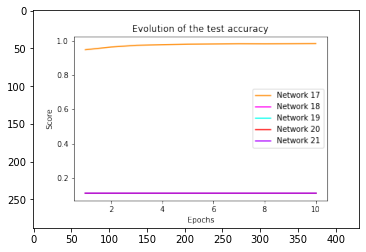

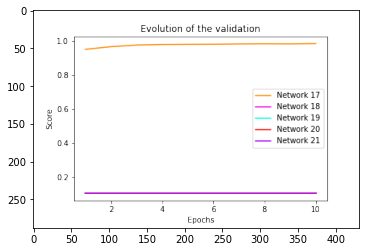

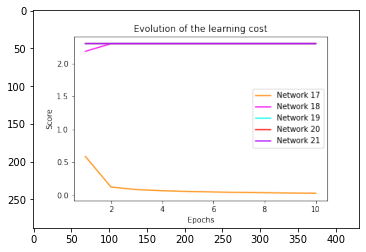

In [13]:
displayImages([
    "./output/save/10_epochs/3/etas/test_accuracy/plot_.png",
    "./output/save/10_epochs/3/etas/validation_accuracy/plot_.png",
    "./output/save/10_epochs/3/etas/learning_cost/plot_.png"
])

On propose de continuer avec le pas 0,1, qui est plus efficient que les autres.

### Tests avec différents lmbdas

On teste le réseau de neurones actuel avec des valeurs de lmbdas différentes :

In [ ]:
# Valeurs fixes
EPOCHS = 10
BATCH_SIZE = 2 ** 7
ETA = 0.1
LAYER = [
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 1, 28, 28),
        filter_shape=(20, 1, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 20, 12, 12),
        filter_shape=(40, 20, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.FullyConnectedLayer(
        n_in=40 * 4 * 4, 
        n_out=100, 
        activation_fn=n3.ReLU
    ),
    n3.SoftmaxLayer(
        n_in=100, 
        n_out=10
    )
]

# Valeurs dynamiques
LMBDAS = [ 0.1 * i for i in range(0,5) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
testAccuracyPlot = SmartPlot("Evolution of the test accuracy", path="./output/3/lmbdas/test_accuracy")
validationAccuracyPlot = SmartPlot("Evolution of the validation", path="./output/3/lmbdas/validation_accuracy")
learningCostPlot = SmartPlot("Evolution of the learning cost", path="./output/3/lmbdas/learning_cost")
COLORS = randomColors()

bvas, bvas_epoch, bvas_lc, bvas_ta, tas, tas_epoch, tas_lc, tas_va = [], [], [], [], [], [], [], []
for i in range(len(ETAS)):
    
    # On entraine l'IA
    bva, bva_epoch, bva_ta, vba_tc, bta, bta_epoch, bta_va, bta_tc = trainAndTestNet3(LAYER, training_data, validation_data, test_data, n_training_data, n_validation_data, n_test_data, EPOCHS, BATCH_SIZE, ETA, LMBDAS[i], testAccuracyPlot, validationAccuracyPlot, learningCostPlot, COLORS[i])

    # On ajoute les scores
    bvas.append(bva)
    bvas_epoch.append(bva_epoch)
    bvas_ta.append(bva_ta)
    bvas_lc.append(vba_tc)

    tas.append(bta)
    tas_epoch.append(bta_epoch)
    tas_va.append(bta_va)
    tas_lc.append(bta_tc)


# On récupère les valeurs des graphiques
testAccuracyPlot.build()
validationAccuracyPlot.build()
learningCostPlot.build()


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(bvas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, n_training_data, n_validation_data, n_test_data))
print(" - Epoch : {}".format(bvas_epoch[id]))
print(" - Learning cost : {}".format(bvas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(bvas[id], n_validation_data, bvas[id] * 100 / n_validation_data))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(max(bvas_ta), n_test_data, max(bvas_ta) * 100 / n_test_data))

print()

id = np.argmax(tas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, n_training_data, n_validation_data, n_test_data))
print(" - Epoch : {}".format(tas_epoch[id]))
print(" - Learning cost : {}".format(tas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(tas_va[id], n_validation_data, tas_va[id] * 100 / n_validation_data))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(tas[id], n_test_data, tas[id] * 100 / n_test_data))


Cela donne avec 10 epochs :

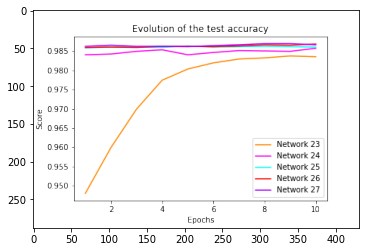

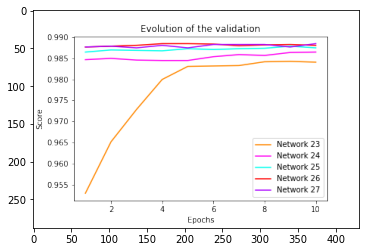

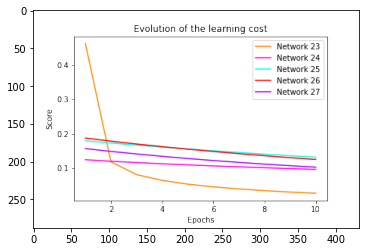

In [14]:
displayImages([
    "./output/save/10_epochs/3/lmbdas/test_accuracy/plot_.png",
    "./output/save/10_epochs/3/lmbdas/validation_accuracy/plot_.png",
    "./output/save/10_epochs/3/lmbdas/learning_cost/plot_.png"
])

On propose ainsi de continuer avec le lmbda 0,0, qui est plus stable que les autres.

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 1/3 pour l'apprentisage et 2/3 pour les tests ;


>> 1. TRAINING & TEST <<


Training Network 1... > eta=0.1, lmbda=0.0, L=25000, V=10000, T=5000

Epoch 5
- Training cost 0.084
- Validation accuracy 97.24%
- Test accuracy 96.15%
Epoch 10
- Training cost 0.041
- Validation accuracy 97.82%
- Test accuracy 96.94%

Finished training network.
Best validation accuracy : 97.83% corresponding to epoch 9
Best test accuracy accuracy : 96.94% corresponding to epoch 10
Network 1 trained...


Training Network 2... > eta=0.1, lmbda=0.0, L=33333, V=10000, T=3333

Epoch 5
- Training cost 0.029
- Validation accuracy 98.09%
- Test accuracy 97.66%
Epoch 10
- Training cost 0.016
- Validation accuracy 98.16%
- Test accuracy 97.57%

Finished training network.
Best validation accuracy : 98.21% corresponding to epoch 8
Best test accuracy accuracy : 97.75% corresponding to epoch 8
Network 2 trained...


Training Network 3... > eta=0.1, lmbda=0.0, L=16666, V=10000, T=6666

Epoch 5
- Training cost 0.0046
- Validation accuracy 98.29%
- Test accuracy 98.03%
Epoc

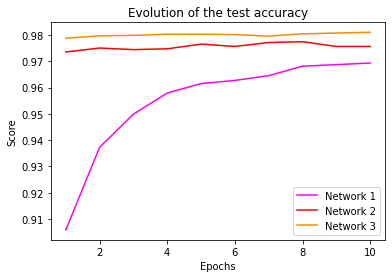

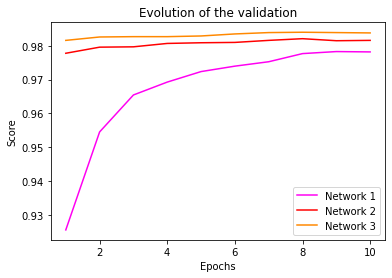

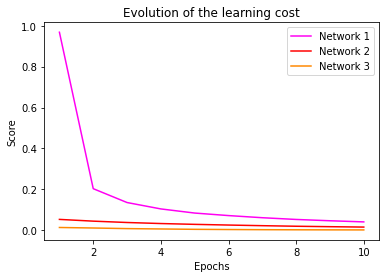

In [4]:
# Valeurs fixes
EPOCHS = 10
BATCH_SIZE = 2 ** 7
ETA = 0.1
LMBDA = 0.0
LAYER = [
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 1, 28, 28),
        filter_shape=(20, 1, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.ConvPoolLayer(
        image_shape=(BATCH_SIZE, 20, 12, 12),
        filter_shape=(40, 20, 5, 5),
        poolsize=(2, 2),
        activation_fn=n3.ReLU
    ),
    n3.FullyConnectedLayer(
        n_in=40 * 4 * 4, 
        n_out=100, 
        activation_fn=n3.ReLU
    ),
    n3.SoftmaxLayer(
        n_in=100, 
        n_out=10
    )
]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
VALIDATION_SIZES = [ n_validation_data, n_validation_data, n_validation_data ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
testAccuracyPlot = SmartPlot("Evolution of the test accuracy", path="./output/3/ratios/test_accuracy")
validationAccuracyPlot = SmartPlot("Evolution of the validation", path="./output/3/ratios/validation_accuracy")
learningCostPlot = SmartPlot("Evolution of the learning cost", path="./output/3/ratios/learning_cost")
COLORS = randomColors()

bvas, bvas_epoch, bvas_lc, bvas_ta, tas, tas_epoch, tas_lc, tas_va = [], [], [], [], [], [], [], []
for i in range(3):
    
    # On entraine l'IA
    bva, bva_epoch, bva_ta, vba_tc, bta, bta_epoch, bta_va, bta_tc = trainAndTestNet3(LAYER, training_data, validation_data, test_data, int(TRAINING_SIZES[i]), int(VALIDATION_SIZES[i]), int(TEST_SIZES[i]), EPOCHS, BATCH_SIZE, ETA, LMBDA, testAccuracyPlot, validationAccuracyPlot, learningCostPlot, COLORS[i])

    # On ajoute les scores
    bvas.append(bva)
    bvas_epoch.append(bva_epoch)
    bvas_ta.append(bva_ta)
    bvas_lc.append(vba_tc)

    tas.append(bta)
    tas_epoch.append(bta_epoch)
    tas_va.append(bta_va)
    tas_lc.append(bta_tc)


# On récupère les valeurs des graphiques
testAccuracyPlot.build()
validationAccuracyPlot.build()
learningCostPlot.build()


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(bvas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, int(TRAINING_SIZES[id]), int(VALIDATION_SIZES[i]), int(TEST_SIZES[id])))
print(" - Epoch : {}".format(bvas_epoch[id]))
print(" - Learning cost : {}".format(bvas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(bvas[id], int(VALIDATION_SIZES[i]), bvas[id] * 100 / int(VALIDATION_SIZES[i])))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(max(bvas_ta), int(TEST_SIZES[i]), max(bvas_ta) * 100 / int(TEST_SIZES[i])))

print()

id = np.argmax(tas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, int(TRAINING_SIZES[id]), int(VALIDATION_SIZES[i]), int(TEST_SIZES[id])))
print(" - Epoch : {}".format(tas_epoch[id]))
print(" - Learning cost : {}".format(tas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(tas_va[id], int(VALIDATION_SIZES[i]), tas_va[id] * 100 / int(VALIDATION_SIZES[i])))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(tas[id], int(TEST_SIZES[i]), tas[id] * 100 / int(TEST_SIZES[i])))


Cela donne avec 10 epochs :

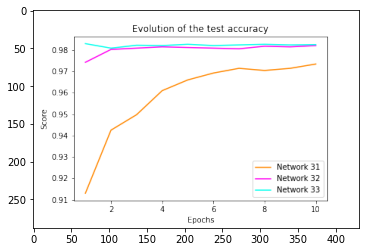

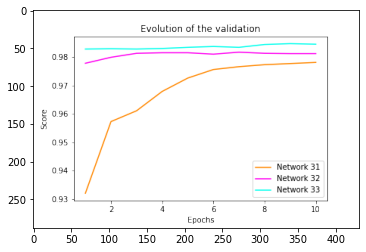

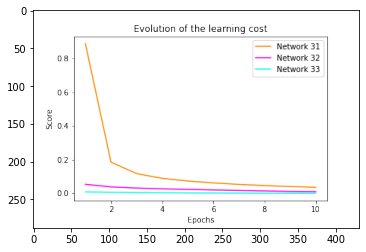

In [15]:
displayImages([
    "./output/save/10_epochs/3/ratios/test_accuracy/plot_.png",
    "./output/save/10_epochs/3/ratios/validation_accuracy/plot_.png",
    "./output/save/10_epochs/3/ratios/learning_cost/plot_.png"
])

Dans ce dernier cas de figure, les 3 réseaux sont aussi performants. On obtient de très bons scores de l'ordre de quasiment 98% de prédictions.

Ewen BOUQUET
Loïc FOURNIER